# Dataset
This notebook provides an example of the data utilised to generate a forecast using Aardvark Weather. We explore a single timeslice containing all the observations required to generate a forecast. This sample data is the output of the loader `WeatherDatasetE2E` in `../aardvark/loaders.py`.

In [1]:
import numpy as np
import pickle

In [2]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


## Data
Open a sample of data required to produce a forecast.

In [3]:
with open('../data/sample_data_final.pkl', 'rb') as fp:
    data = pickle.load(fp)

Multiple different datasets are utilised as input to create a forecast, each with multiple channels including observations and metadata. Example channels for each of these are plotted below. The plot_channel variable in each cell can be adjusted to visualise different channels. 

In [4]:
# Set up longitude and latitude for plotting
lon = np.linspace(0,359,360)
lat = np.linspace(90,-90,181)

lon_1p5 = np.linspace(0,359,240)
lat_1p5 = np.linspace(90,-90,121)

## Satellite
First visualise the satellite data from HIRS, AMSU-A, AMSU-B, IASI and ASCAT

### HIRS

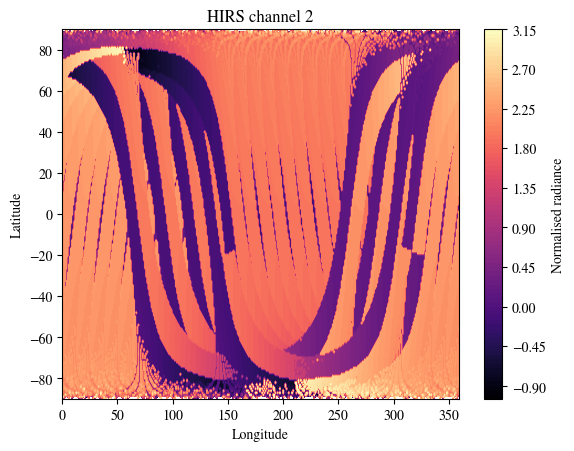

In [16]:
fig = plt.figure()
plot_channel = 2
p = plt.contourf(
    lon,
    lat,
    data["assimilation"]["hirs_current"][0,...,plot_channel].cpu().T, 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"HIRS channel {plot_channel}")
plt.show()

### AMSU-A

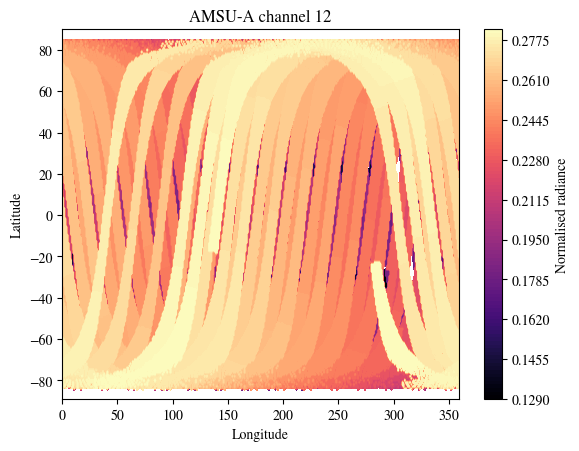

In [15]:
fig = plt.figure()
plot_channel = 12
p = plt.contourf(
    lon, 
    lat[:-1],
    data["assimilation"]["amsua_current"][0,...,plot_channel].cpu(), 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"AMSU-A channel {plot_channel}")
plt.show()

### AMSU-B

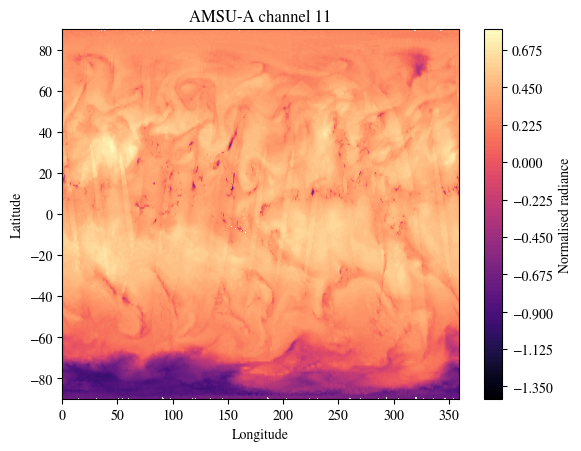

In [19]:
fig = plt.figure()
plot_channel = 11
p = plt.contourf(
    lon,
    lat,
    data["assimilation"]["amsub_current"][0,...,plot_channel].T.cpu(), 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"AMSU-A channel {plot_channel}")
plt.show()

### IASI

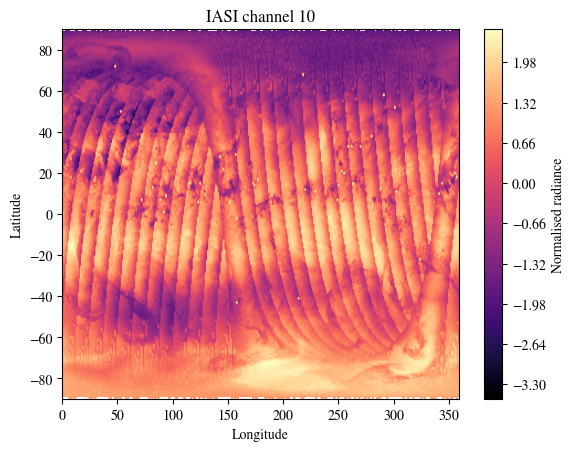

In [8]:
fig = plt.figure()
plot_channel = 10
p = plt.contourf(
    lon,
    lat,
    data["assimilation"]["iasi_current"][0,...,plot_channel].T.cpu(), 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"IASI channel {plot_channel}")
plt.show()

### ASCAT

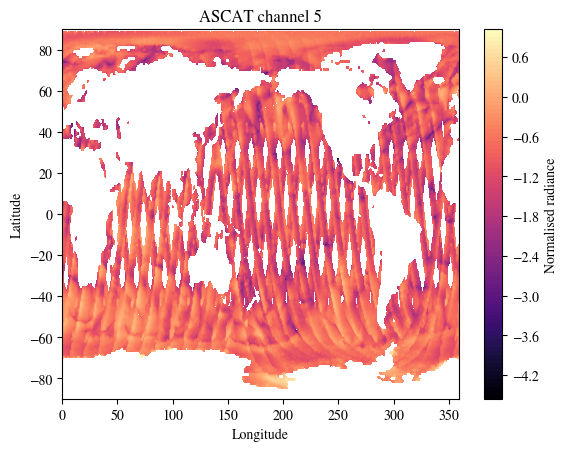

In [9]:
fig = plt.figure()
plot_channel = 5
p = plt.contourf(
    lon,
    lat,
    data["assimilation"]["ascat_current"][0,...,plot_channel].T.cpu(), 
    levels=100,
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised radiance') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"ASCAT channel {plot_channel}")
plt.show()

## SYNOPS
We next visualise the SYNOPS data from land stations, marine platforms and radiosonde profiles

### HadISD

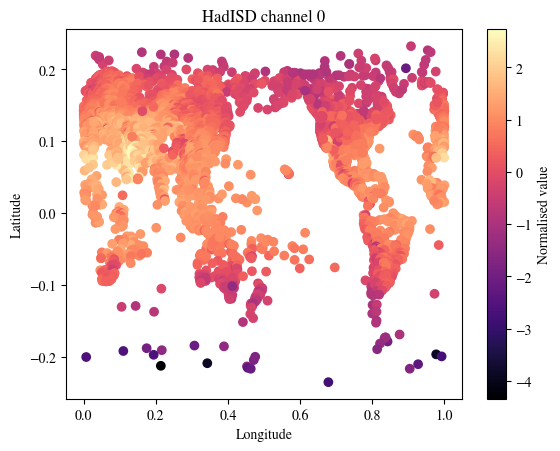

In [24]:
fig = plt.figure()
plot_channel = 0
p = plt.scatter(
    data["assimilation"]["x_context_hadisd_current"][plot_channel][0,0,:].cpu(),
    data["assimilation"]["x_context_hadisd_current"][plot_channel][0,1,:].cpu(),
    c = data["assimilation"]["y_context_hadisd_current"][plot_channel][0].T.cpu(), 
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised value') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"HadISD channel {plot_channel}")
plt.show()

### ICOADS

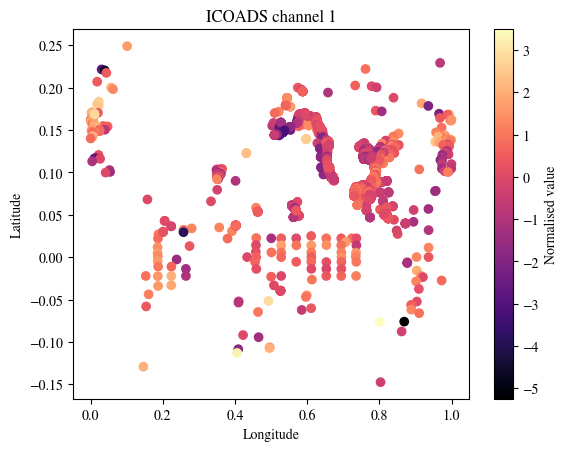

In [11]:
plot_channel = 1
fig = plt.figure()
p = plt.scatter(
    data["assimilation"]["icoads_x_current"][0][0,:].cpu(),
    data["assimilation"]["icoads_x_current"][1][0,:].cpu(),
    c = data["assimilation"]["icoads_current"][0,plot_channel,:].T.cpu(), 
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised value') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"ICOADS channel {plot_channel}")
plt.show()

### IGRA

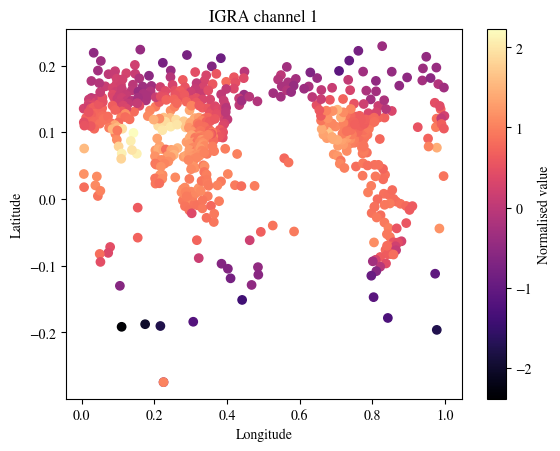

In [12]:
plot_channel = 1
fig = plt.figure()
p = plt.scatter(
    data["assimilation"]["igra_x_current"][0][0,:].cpu(),
    data["assimilation"]["igra_x_current"][1][0,:].cpu(),
    c = data["assimilation"]["igra_current"][0,plot_channel,:].T.cpu(), 
    cmap="magma")
cbar = fig.colorbar(p)
cbar.set_label('Normalised value') 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"IGRA channel {plot_channel}")
plt.show()